# 环境库

In [3]:
%pip install akshare --upgrade

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 82.4 MB/s eta 0:00:00
  Created wheel for jsonpath: filename=jsonpath-0.82.2-py3-none-any.whl size=5615 sha256=eddadb3e8fbed825042797644e2c32d63eb89db168bfe84ed6f521d8c9724556
  Stored in directory: /root/.cache/pip/wheels/7d/b8/16/48bbd715040679311fa68cb564ad24a97d9a67fea5d4c848c8
Successfully built jsonpath


In [4]:
import akshare as ak;
import numpy as np
import pandas as pd

# 数据

In [5]:
from pylab import plt
plt.style.use('seaborn-v0_8')
%config InlineBackend.figure_format = 'svg'

In [6]:
#dt = ak.stock_zh_a_minute(symbol='sz300188', period='1');
dt = ak.stock_zh_a_daily(symbol="sh600048", start_date="20240101", end_date='20250815', adjust="qfq");
tm = 'date';
# tm = 'day';

In [7]:
print(dt.tail(10));

           date  open  high   low  close       volume        amount  \
383  2025-08-04  7.99  7.99  7.93   7.99   89911883.0  7.155828e+08   
384  2025-08-05  7.99  8.05  7.97   8.04  100854527.0  8.084916e+08   
385  2025-08-06  8.03  8.03  7.97   8.01   79003224.0  6.318822e+08   
386  2025-08-07  8.00  8.05  7.95   8.04  113334525.0  9.067155e+08   
387  2025-08-08  8.02  8.04  7.98   8.01   74432362.0  5.958251e+08   
388  2025-08-11  8.04  8.09  8.03   8.03  112944649.0  9.098835e+08   
389  2025-08-12  8.03  8.07  8.01   8.02   97401443.0  7.824929e+08   
390  2025-08-13  8.04  8.05  7.98   8.00  107251058.0  8.584485e+08   
391  2025-08-14  8.01  8.13  7.99   8.01  192971875.0  1.553063e+09   
392  2025-08-15  8.01  8.19  7.99   8.15  263836630.0  2.146463e+09   

     outstanding_share  turnover  
383       1.197044e+10  0.007511  
384       1.197044e+10  0.008425  
385       1.197044e+10  0.006600  
386       1.197044e+10  0.009468  
387       1.197044e+10  0.006218  
388     

In [8]:
# pd.DataFrame(columns=['列1', '列2', '列3'])；
data = pd.DataFrame();
data[tm] = pd.to_datetime(dt[tm]);
data['open'] = dt['open'].astype(np.float64);
data['high'] = dt['high'].astype(np.float64);
data['low'] = dt['low'].astype(np.float64);
data['close'] = pd.to_numeric(dt['close']);
data['volume'] = dt['volume'].astype(np.int64);

In [9]:
data['r'] = np.log(data['close'] / data['close'].shift(1));
data['d'] = np.sign(data['r']);

In [10]:
print(data.tail(10));

          date  open  high   low  close     volume         r    d
383 2025-08-04  7.99  7.99  7.93   7.99   89911883  0.005019  1.0
384 2025-08-05  7.99  8.05  7.97   8.04  100854527  0.006238  1.0
385 2025-08-06  8.03  8.03  7.97   8.01   79003224 -0.003738 -1.0
386 2025-08-07  8.00  8.05  7.95   8.04  113334525  0.003738  1.0
387 2025-08-08  8.02  8.04  7.98   8.01   74432362 -0.003738 -1.0
388 2025-08-11  8.04  8.09  8.03   8.03  112944649  0.002494  1.0
389 2025-08-12  8.03  8.07  8.01   8.02   97401443 -0.001246 -1.0
390 2025-08-13  8.04  8.05  7.98   8.00  107251058 -0.002497 -1.0
391 2025-08-14  8.01  8.13  7.99   8.01  192971875  0.001249  1.0
392 2025-08-15  8.01  8.19  7.99   8.15  263836630  0.017327  1.0


# 策略

In [11]:
lags = 3

In [12]:
cols = list()
for lag in range(1, lags + 1):
    col = f'lag_{lag}'
    data[col] = data['r'].shift(lag)
    cols.append(col)

代码的作用是在 data 这个 DataFrame 中创建滞后的收益率列。

* 首先，它初始化了一个名为 cols 的空列表，用来存储后面创建的列名。
* 然后，它会循环 lags 次（这里 lags 的值是 3）。
* 在每次循环中，它会根据当前的 lag 值创建一个新的列名，例如 'lag_1', 'lag_2', 'lag_3'。
* 接着，它会在 data DataFrame 中创建一个新的列，列名就是刚刚生成的。这一列的值是 'r' 列（收益率列）向下移动 lag 行得到的结果。这样就创建了包含过去收益率值的列。
* 最后，它将新创建的列名添加到 cols 列表中。

这段代码运行后，data DataFrame 中会增加名为 'lag_1', 'lag_2' 和 'lag_3' 的新列，它们分别包含前 1、2 和 3 个时间段的收益率数据。

In [13]:
print(data.head(10));

        date  open  high   low  close     volume         r    d     lag_1  \
0 2024-01-02  9.38  9.41  8.97   8.98  117278568       NaN  NaN       NaN   
1 2024-01-03  8.96  9.13  8.88   8.96   89972552 -0.002230 -1.0       NaN   
2 2024-01-04  8.94  8.96  8.62   8.72  105095748 -0.027151 -1.0 -0.002230   
3 2024-01-05  8.69  8.93  8.63   8.74  101885181  0.002291  1.0 -0.027151   
4 2024-01-08  8.74  8.80  8.61   8.63   67455132 -0.012666 -1.0  0.002291   
5 2024-01-09  8.63  8.75  8.52   8.69   68893095  0.006928  1.0 -0.012666   
6 2024-01-10  8.63  8.74  8.57   8.64   51969457 -0.005770 -1.0  0.006928   
7 2024-01-11  8.59  8.73  8.49   8.68   71558960  0.004619  1.0 -0.005770   
8 2024-01-12  8.61  8.85  8.60   8.71   76036361  0.003450  1.0  0.004619   
9 2024-01-15  8.65  8.73  8.49   8.59   84444184 -0.013873 -1.0  0.003450   

      lag_2     lag_3  
0       NaN       NaN  
1       NaN       NaN  
2       NaN       NaN  
3 -0.002230       NaN  
4 -0.027151 -0.002230  
5  0.002

In [14]:
data.dropna(inplace=True); #删除 DataFrame 中所有包含缺失值（NaN）的行

In [15]:
data['d'] = data['d'].astype(int); #将 data DataFrame 中 'd' 列的数据类型转换为整数

# 拆分出训练数据和验证数据

In [16]:
split = int(len(data) * 0.8); #计算用于将数据集分割成训练集和测试集的索引位置

In [17]:
print(split);

311


将数据分割成 80% 的训练集和 20% 的测试集

## 准备训练数据

In [18]:
train = data.iloc[:split].copy(); #从第一行开始，split 表示到 split 索引（不包含该行）为止,复制一份到训练中

In [19]:
mu, std = train.drop(tm, axis=1).mean(), train.drop(tm, axis=1).std(); #计算得出两数组
# mu, std = train[['open','high','low','close','volume']].mean(),train[['open','high','low','close','volume']].std();

* mean() 平均值
* std() 标准差，衡量数据的离散程度。

计算训练集的均值和标准差通常是数据预处理的一个重要步骤，特别是当您需要对数据进行标准化（Standardization）或归一化（Normalization）时。

使用训练集的统计信息来转换训练集和测试集可以避免数据泄露（Data Leakage），即测试集的信息“泄露”到训练过程中。

In [20]:
print(train.head(10));

         date  open  high   low  close     volume         r  d     lag_1  \
4  2024-01-08  8.74  8.80  8.61   8.63   67455132 -0.012666 -1  0.002291   
5  2024-01-09  8.63  8.75  8.52   8.69   68893095  0.006928  1 -0.012666   
6  2024-01-10  8.63  8.74  8.57   8.64   51969457 -0.005770 -1  0.006928   
7  2024-01-11  8.59  8.73  8.49   8.68   71558960  0.004619  1 -0.005770   
8  2024-01-12  8.61  8.85  8.60   8.71   76036361  0.003450  1  0.004619   
9  2024-01-15  8.65  8.73  8.49   8.59   84444184 -0.013873 -1  0.003450   
10 2024-01-16  8.54  8.62  8.36   8.50  100238746 -0.010533 -1 -0.013873   
11 2024-01-17  8.43  8.47  8.26   8.26   86415702 -0.028642 -1 -0.010533   
12 2024-01-18  8.20  8.44  8.17   8.42  103959172  0.019185  1 -0.028642   
13 2024-01-19  8.36  8.51  8.33   8.45   74915499  0.003557  1  0.019185   

       lag_2     lag_3  
4  -0.027151 -0.002230  
5   0.002291 -0.027151  
6  -0.012666  0.002291  
7   0.006928 -0.012666  
8  -0.005770  0.006928  
9   0.004619 

In [21]:
print(mu);
print(std);

open      8.972154e+00
high      9.149614e+00
low       8.828682e+00
close     8.988457e+00
volume    1.344288e+08
r         3.658099e-05
d        -9.003215e-02
lag_1     1.051956e-04
lag_2     3.568776e-05
lag_3     7.782509e-05
dtype: float64
open      9.058082e-01
high      9.373359e-01
low       8.527968e-01
close     8.914607e-01
volume    8.280727e+07
r         2.543744e-02
d         9.795969e-01
lag_1     2.541457e-02
lag_2     2.545956e-02
lag_3     2.544488e-02
dtype: float64


In [22]:
train_ = (train.drop(tm, axis=1) - mu) / std;

In [23]:
print(train_.tail(10));

         open      high       low     close    volume         r         d  \
305 -0.190056 -0.180953 -0.268155 -0.009486  0.568988  0.262108  1.112735   
306 -0.101737 -0.287639 -0.186072 -0.289925 -0.192501 -1.111397 -0.928921   
307 -0.377734 -0.447667 -0.256429 -0.357230 -0.777291 -0.272557 -0.928921   
308 -0.366694 -0.511678 -0.326786 -0.368448 -0.854204 -0.046807 -0.928921   
309 -0.355654 -0.340981 -0.232977 -0.177749 -0.043447  0.762801  1.112735   
310 -0.190056  0.181777 -0.080537  0.237300  1.704328  1.612264  1.112735   
311  0.141140  0.096428  0.224342  0.237300 -0.284237 -0.001438  0.091907   
312  0.185299  0.000412  0.247794  0.080254 -0.649322 -0.604265 -0.928921   
313  0.085941 -0.052931  0.165712  0.024166 -0.836210 -0.218993 -0.928921   
314  0.030741 -0.127611 -0.021906 -0.166532 -0.452097 -0.750263 -0.928921   

        lag_1     lag_2     lag_3  
305  1.893583  2.725005 -2.219122  
306  0.259644  1.892966  2.724921  
307 -1.115097  0.261915  1.892402  
308 -0.2

## 准备验证数据

In [24]:
test = data.iloc[split:].copy(); #%20的测试数据
test_ = (test.drop(tm, axis=1) - mu) / std

# 训练

In [25]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

* MLPClassifier 是用于分类任务的多层感知器（Multilayer Perceptron）模型，也就是一种神经网络模型。
* accuracy_score 是一个评估分类模型性能的指标，它计算模型预测的准确率，即正确预测的样本占总样本数的比例。

In [26]:
model = MLPClassifier(hidden_layer_sizes=[24],
                      shuffle=False,
                      max_iter=500)

* model = MLPClassifier(...): 创建一个 MLPClassifier 对象，并将其赋值给变量 model。
* hidden_layer_sizes=[24]: 这个参数指定了神经网络中隐藏层的结构。[24] 表示模型有一个隐藏层，这个隐藏层有 24 个神经元。您可以根据需要调整隐藏层的数量和每个隐藏层的神经元数量。
* shuffle=False: 这个参数控制在每次迭代训练时是否打乱训练数据的顺序。在这里设置为 False 意味着数据将按照原始顺序进行训练。在时间序列数据中，通常不打乱数据顺序，以保留时间上的依赖性。
* max_iter=500: 这个参数指定了模型训练的最大迭代次数（epochs）。模型会在最多进行 500 次完整的训练数据遍历后停止训练。如果模型在达到最大迭代次数之前收敛（损失函数不再显著下降），训练也会提前停止。

总的来说，这段代码创建了一个具有一个包含 24 个神经元的隐藏层的神经网络模型，并设置了训练时数据不打乱以及最大迭代次数为 500。这个 model 对象将在后续步骤中用于训练和预测。

In [27]:
model.fit(train_[cols], train['d'])

MLPClassifier(hidden_layer_sizes=[24], max_iter=500, shuffle=False)

使用训练数据来训练之前创建的神经网络模型。

* .fit(...): 这是机器学习模型对象的标准方法，用于使用提供的数据来训练模型。
* train_[cols]: 这是训练模型的特征数据。
  * 等价于 train_[['lag_1', 'lag_2', 'lag_3']];
  * train_ 是经过标准化的训练集 DataFrame。
  * [cols] 使用之前定义的 cols 列表（包含 'lag_1', 'lag_2', 'lag_3'）来选择 train_ DataFrame 中作为模型输入的特征列。
* train['d']: 这是训练模型的标签或目标变量。
  * train 是原始的训练集 DataFrame。
  * ['d'] 选择了 'd' 列，它包含了您想要模型预测的目标值（在这里是收益率的方向，1 或 -1）。

简而言之,告诉模型使用 train_ DataFrame 中滞后收益率列的数据 (train_[cols]) 作为输入特征，

并使用 train DataFrame 中的 'd' 列数据 (train['d']) 作为对应的目标输出来学习如何进行分类。

模型会根据这些数据调整其内部参数，以便能够对新的、未见过的数据进行预测。  

In [28]:
score = accuracy_score(train['d'], model.predict(train_[cols]));
print(score);

0.5884244372990354


计算训练集上模型预测的准确率。
* accuracy_score(...): 这是您之前导入的用于计算准确率的函数。它需要两个参数：真实标签和模型预测的标签。
* train['d']: 这是训练集的真实标签，也就是 train DataFrame 中的 'd' 列。
* model.predict(train_[cols]): 这部分代码使用训练好的 model 对训练数据 train_[cols] 进行预测。model.predict() 方法会返回模型预测的标签。

所以，accuracy_score() 函数会将训练集的真实标签 (train['d']) 与模型在训练集上预测的标签 (model.predict(train_[cols])) 进行比较，然后计算并返回准确率。

这个准确率告诉您模型在它已经“见过”的数据上表现如何。

通常，训练集上的准确率会比较高，但这并不能完全代表模型在新的、未见过的数据上的表现。

为了评估模型的泛化能力，您还需要计算在测试集上的准确率。

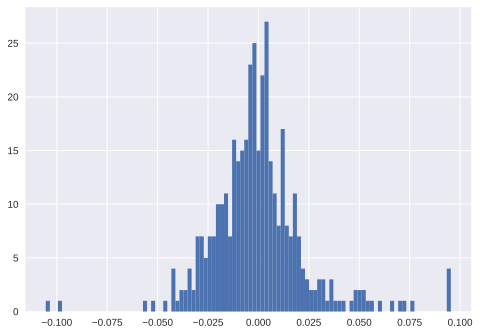

In [29]:
data['r'].hist(bins=100);

绘制收益率 'r' 列的直方图。

* data['r']: 选择了 data DataFrame 中的 'r' 列，也就是计算出的收益率数据。
    .hist(bins=100): 这是 pandas Series 的一个方法，用于绘制直方图。
* bins=100 参数指定了直方图的 bin（柱子）的数量。设置 bins=100 会将收益率数据的范围分成 100 个区间，然后统计每个区间内的数据点数量。

这段代码会生成一个直方图，显示收益率 'r' 的分布情况。
可以从直方图中看出收益率主要集中在哪些范围内，以及它们的分布形状（例如是否接近正态分布）。

# 检验

In [30]:
test['p'] = model.predict(test_[cols])

使用训练好的模型对测试数据进行预测，并将预测结果存储在 test DataFrame 的新列中。

* test: 这是您之前创建的测试集 DataFrame，包含了原始数据中用于验证模型的 20% 数据。
* ['p']: 在 test DataFrame 中创建一个新的列，命名为 'p'。这个列将用于存储模型的预测结果。
* model.predict(test_[cols]): 这部分代码使用训练好的 model 对测试数据的特征 (test_[cols]) 进行预测。
  * test_ 是经过标准化的测试集 DataFrame。
  * [cols] 选择了 test_ DataFrame 中用于预测的特征列（即滞后收益率列）。
  * model.predict() 方法会返回模型对这些测试数据样本的预测结果（在这里是预测的收益率方向，1 或 -1）。

因此，这行代码将模型在测试集上的预测结果赋值给了 test DataFrame 中的 'p' 列。

这样您就可以将模型的预测结果与测试集的真实标签（在 'd' 列中）进行比较，从而评估模型在未见过的数据上的表现。

In [40]:
print(test.tail(10).to_string());
# display(test.tail(100));

          date  open  high   low  close     volume         r  d     lag_1     lag_2     lag_3  p         s
383 2025-08-04  7.99  7.99  7.93   7.99   89911883  0.005019  1 -0.003766 -0.041724 -0.011948 -1 -0.005019
384 2025-08-05  7.99  8.05  7.97   8.04  100854527  0.006238  1  0.005019 -0.003766 -0.041724 -1 -0.006238
385 2025-08-06  8.03  8.03  7.97   8.01   79003224 -0.003738 -1  0.006238  0.005019 -0.003766 -1  0.003738
386 2025-08-07  8.00  8.05  7.95   8.04  113334525  0.003738  1 -0.003738  0.006238  0.005019 -1 -0.003738
387 2025-08-08  8.02  8.04  7.98   8.01   74432362 -0.003738 -1  0.003738 -0.003738  0.006238 -1  0.003738
388 2025-08-11  8.04  8.09  8.03   8.03  112944649  0.002494  1 -0.003738  0.003738 -0.003738 -1 -0.002494
389 2025-08-12  8.03  8.07  8.01   8.02   97401443 -0.001246 -1  0.002494 -0.003738  0.003738 -1  0.001246
390 2025-08-13  8.04  8.05  7.98   8.00  107251058 -0.002497 -1 -0.001246  0.002494 -0.003738 -1  0.002497
391 2025-08-14  8.01  8.13  7.99   8.

In [32]:
test_score = accuracy_score(test['d'], test['p']);
print(test_score);

0.46153846153846156


In [33]:
test['s'] = test['p'] * test['r']

计算基于模型预测的交易策略在测试集上的收益。

* test: 这是测试集 DataFrame。
* ['s']: 在 test DataFrame 中创建一个新的列，命名为 's'。这个列将用于存储策略的瞬时收益。
* test['p']: 这是模型在测试集上对收益率方向的预测结果（1 或 -1）。
* test['r']: 这是测试集上实际的收益率。

这行代码将模型的预测方向 (test['p']) 与实际的收益率 (test['r']) 相乘。

* 如果模型预测方向是 1（上涨），并且实际收益率是正的，那么策略收益就是正的。
* 如果模型预测方向是 1（上涨），但实际收益率是负的，那么策略收益就是负的（亏损）。
* 如果模型预测方向是 -1（下跌），并且实际收益率是负的，那么策略收益就是正的。
* 如果模型预测方向是 -1（下跌），但实际收益率是正的，那么策略收益就是负的（亏损）。

通过计算 test['p'] * test['r']，得到了在每个时间点上，如果按照模型的预测方向进行交易（做多或做空）所获得的收益。这个 's' 列的数据可以用于后续分析策略的整体表现，例如计算累积收益。

您当前的准确率（无论是训练集还是测试集）都比较接近 0.5，这意味着模型预测的正确率大致在随机猜测的水平。在这样的准确率下，test['s'] 计算出的策略收益可能不会很高，甚至可能是负的，因为模型无法有效地预测市场的方向。

In [34]:
rr, ss = test[['r', 's']].sum().apply(np.exp);
print("rr:", rr, "\tss:", ss);

rr: 0.9219457013574659 	ss: 1.0526016823765951


计算测试集上原始收益率 ('r') 和策略收益率 ('s') 的累积和，然后对这些累积和应用指数函数，以得到总的累积收益（或增长因子）。

* test[['r', 's']]: 选择了 test DataFrame 中的 'r' 和 's' 两列。
* .sum(): 对选定的这两列分别计算它们的总和。对于收益率而言，对数收益率的累积和等于总的对数收益率。
* .apply(np.exp): 对 .sum() 计算得到的每个总和应用 np.exp() 函数。指数函数是自然对数的逆运算。如果您计算的是对数收益率的累积和，那么对其应用指数函数就会得到总的累积收益率（即期末价值除以期初价值）。

例如，如果累积对数收益率是 0.1，那么 np.exp(0.1) 会得到一个大于 1 的值，表示总的累积收益是正的。如果累积对数收益率是 -0.1，那么 np.exp(-0.1) 会得到一个小于 1 的值，表示总的累积收益是负的（亏损）。

这段代码的输出将是 'r' 列和 's' 列各自的总累积收益率。通过比较这两个值，可以评估策略 ('s') 相对于简单持有资产 ('r') 在测试期内的表现。

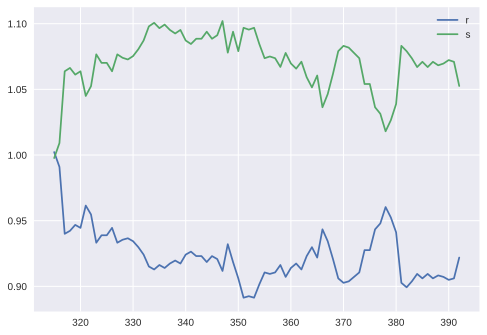

In [35]:
test[['r', 's']].cumsum().apply(np.exp).plot();

绘制测试集上原始收益率 ('r') 和策略收益率 ('s') 的累积收益曲线。

* test[['r', 's']]: 选择了 test DataFrame 中的 'r' 和 's' 两列。
* .cumsum(): 对选定的这两列分别计算它们的累积和。对于对数收益率，累积和表示从开始到当前时间点的总对数收益率。
* .apply(np.exp): 对累积和结果应用 np.exp() 函数。这将对每个时间点的累积对数收益率取指数，从而得到从开始到该时间点的累积收益（增长因子）。累积收益为 1 表示没有收益也没有亏损，大于 1 表示盈利，小于 1 表示亏损。
* .plot(): 对计算出的累积收益结果进行绘图。这将生成一个折线图，显示随着时间推移，原始收益和策略收益的增长情况。

通过这张图，您可以直观地比较在测试期内，简单持有资产的累积收益（'r' 曲线）与按照您的策略进行交易的累积收益（'s' 曲线）的表现。

如果 's' 曲线在测试期结束时高于 'r' 曲线，则表明您的策略在测试期内表现优于简单持有。

# 改用pytorch实现

In [50]:
import torch
import torch.nn as nn
import torch.optim as optim

## 定义一个 PyTorch 模型，它将模仿之前使用的 MLPClassifier 结构

In [51]:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, 2)  # Output size is 2 for binary classification

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

## 准备数据

把 Pandas DataFrame 转换成 PyTorch Tensor，并处理好用于分类的目标变量。

In [52]:
# Convert pandas DataFrames to PyTorch tensors
X_train = torch.tensor(train_[cols].values, dtype=torch.float32)
y_train = torch.tensor(train['d'].values, dtype=torch.long) # Use long for classification labels
X_test = torch.tensor(test_[cols].values, dtype=torch.float32)
y_test = torch.tensor(test['d'].values, dtype=torch.long) # Use long for classification labels

# Adjust labels to be 0 and 1 instead of -1 and 1
y_train = (y_train + 1) // 2
y_test = (y_test + 1) // 2

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: torch.Size([311, 3])
y_train shape: torch.Size([311])
X_test shape: torch.Size([78, 3])
y_test shape: torch.Size([78])


## 定义损失函数和优化器
为 PyTorch 模型定义损失函数和优化器。对于分类任务，交叉熵损失（CrossEntropyLoss）是一个常用的选择，而 Adam 优化器通常表现良好。

需要创建刚刚定义的 PyTorch MLP 类的一个实例，然后使用这个新的 PyTorch 模型实例的参数来初始化优化器。

In [54]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
# Create an instance of the PyTorch MLP model
input_size = X_train.shape[1]
hidden_size = 24 # Use the same hidden size as the scikit-learn model
model_torch = MLP(input_size, hidden_size)
optimizer = optim.Adam(model_torch.parameters(), lr=0.001)

## 训练循环

In [55]:
# Training loop
epochs = 200  # You can adjust the number of epochs
for epoch in range(epochs):
    # Forward pass
    outputs = model_torch(X_train)
    loss = criterion(outputs, y_train)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss occasionally
    if (epoch + 1) % 50 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [50/200], Loss: 0.6686
Epoch [100/200], Loss: 0.6560
Epoch [150/200], Loss: 0.6458
Epoch [200/200], Loss: 0.6358


## 使用测试集来评估模型的性能，并计算准确率

In [56]:
# Evaluate the model
model_torch.eval() # Set the model to evaluation mode
with torch.no_grad(): # Disable gradient calculation for evaluation
    outputs_test = model_torch(X_test)
    _, predicted = torch.max(outputs_test.data, 1)

# Calculate accuracy
test_score_tf = accuracy_score(y_test.numpy(), predicted.numpy()) # Compare with original y_test
print(f'PyTorch Model Accuracy on Test Set: {test_score_tf:.4f}')

# Compare with scikit-learn model accuracy
print(f'Scikit-learn Model Accuracy on Test Set: {test_score:.4f}')

PyTorch Model Accuracy on Test Set: 0.4615
Scikit-learn Model Accuracy on Test Set: 0.4615


## 使用 PyTorch 模型的预测结果来计算交易策略在测试集上的收益。

In [57]:
# Calculate strategy returns for PyTorch model
test['p_tf'] = predicted.numpy() # Store PyTorch predictions in a new column
# Convert predictions back to -1 and 1 for strategy calculation
test['p_tf'] = test['p_tf'].apply(lambda x: 1 if x == 1 else -1)
test['s_tf'] = test['p_tf'] * test['r']

## 绘制累积收益曲线，比较一下原始收益、scikit-learn 模型的策略收益以及 PyTorch 模型的策略收益。

In [58]:
rr_tf, ss_tf = test[['r', 's_tf']].sum().apply(np.exp);
print("rr_tf:", rr_tf, "\tss_tf:", ss_tf);

rr_tf: 0.9219457013574659 	ss_tf: 0.9979362606966602


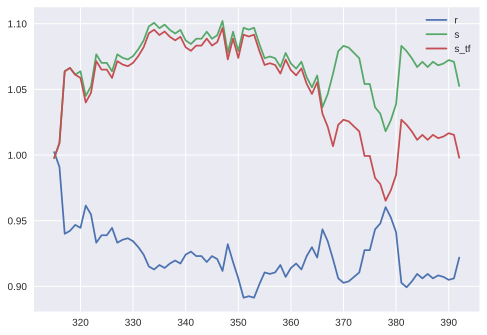

In [59]:
test[['r', 's', 's_tf']].cumsum().apply(np.exp).plot();